# **Telecom Industry Customer Churn Analysis and Prediction**

## Data Loading and Envrionment Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Data Preprocessing

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data = data.drop("customerID", axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(str)

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors="coerce")

In [ ]:
categoricalVariable = data.select_dtypes("object_").columns.to_list()
for i in categoricalVariable:
  data[i] = data[i].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

In [ ]:
data.shape

(7032, 20)

In [ ]:
continuousVariable = data.select_dtypes(exclude=["category"]).columns.to_list()
categoricalVariable = data.select_dtypes("category").columns.to_list()
categoricalVariable.remove("Churn")
catVar = data.select_dtypes("category").columns.to_list()

In [ ]:
continuousVariable

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
categoricalVariable

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
for i in categoricalVariable:
  print(data[i].value_counts())

Male      3549
Female    3483
Name: gender, dtype: int64
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
No     3639
Yes    3393
Name: Partner, dtype: int64
No     4933
Yes    2099
Name: Dependents, dtype: int64
Yes    6352
No      680
Name: PhoneService, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                

## Exploratory Data Analysis

### Target Variable Distribution

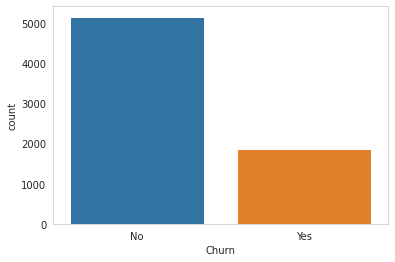

In [ ]:
sns.countplot(x=data["Churn"])

### Feature Distribution

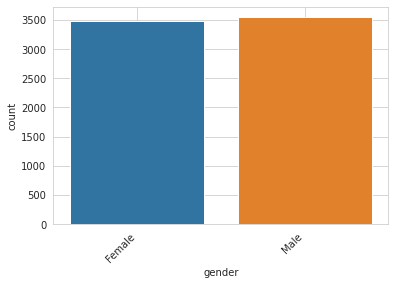

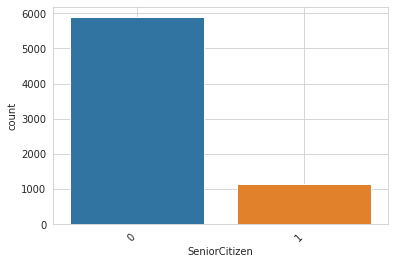

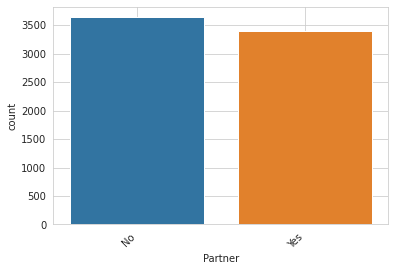

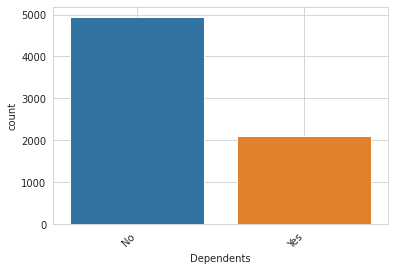

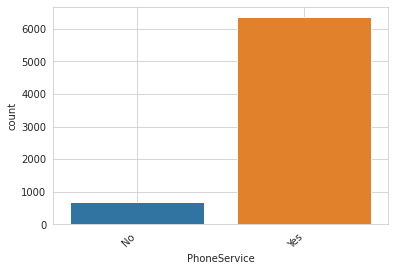

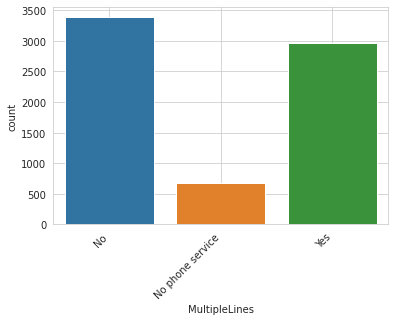

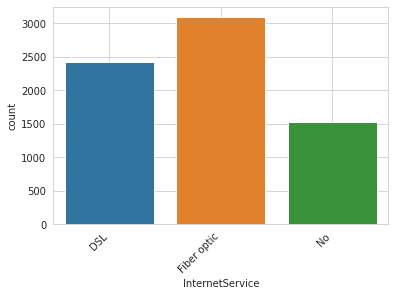

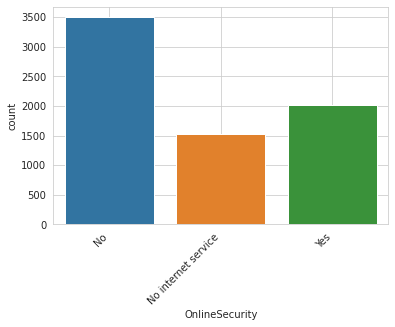

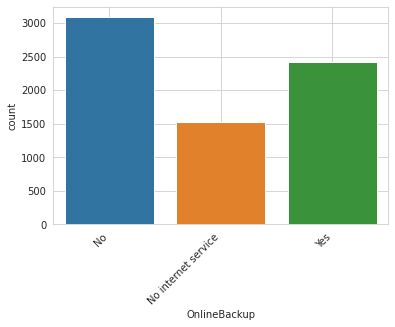

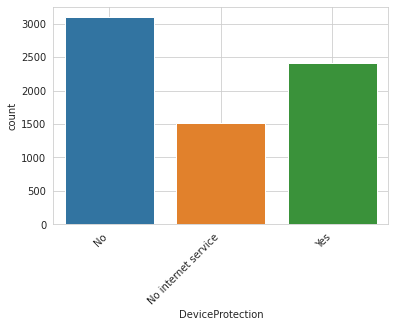

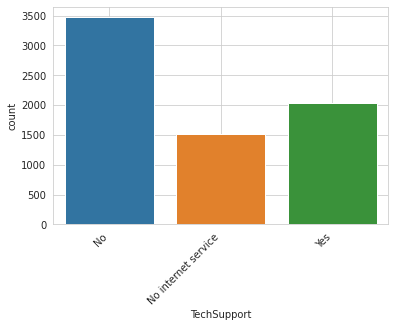

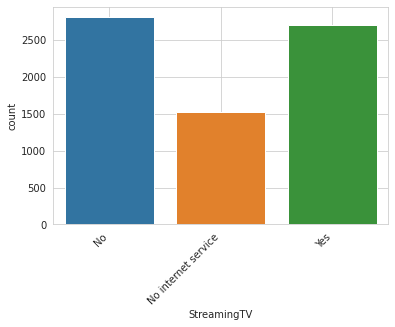

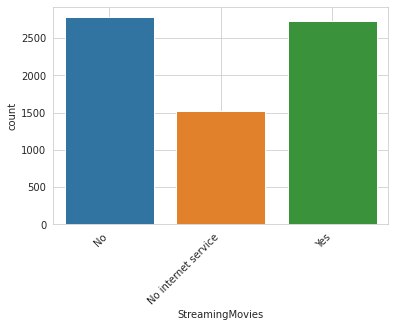

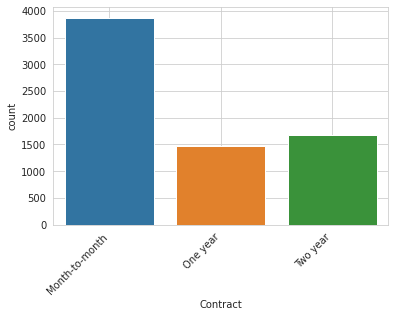

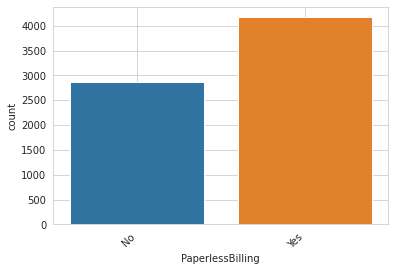

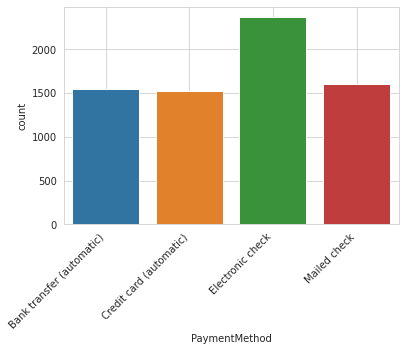

In [ ]:
# Categorical Variables
for i in categoricalVariable:
    sns.countplot(x = data[i])
    plt.xticks(rotation=45, ha='right')
    plt.grid()
    plt.show()

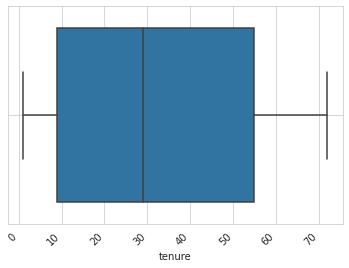

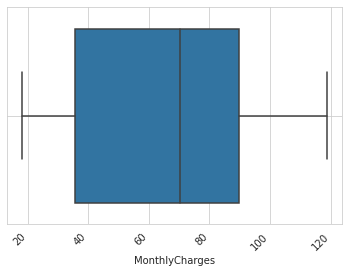

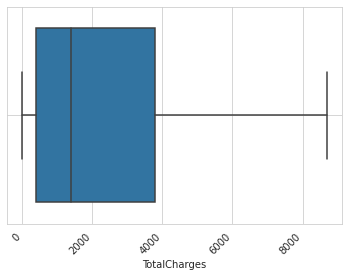

In [ ]:
# Continuous Variables
for i in continuousVariable:
    sns.boxplot(x = data[i])
    plt.xticks(rotation=45, ha='right')
    plt.grid()
    plt.show()


### Relationship Between Features and Target Variable

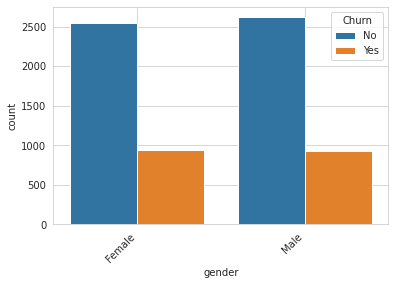

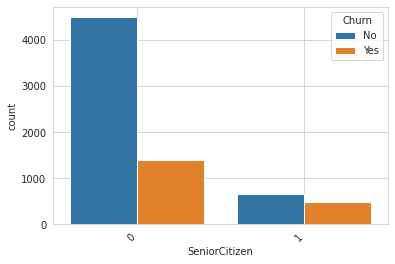

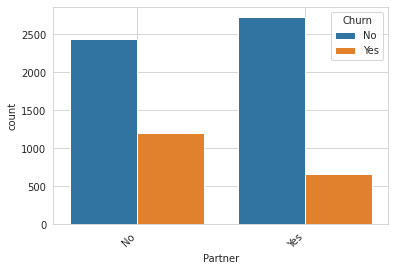

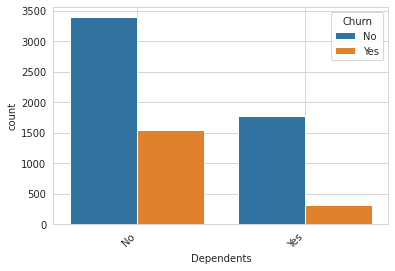

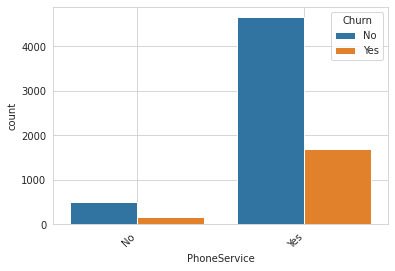

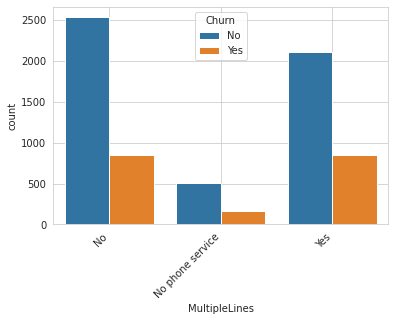

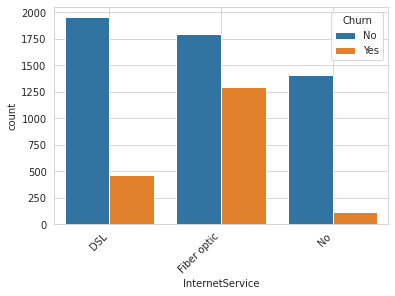

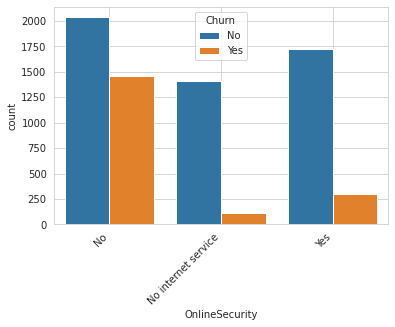

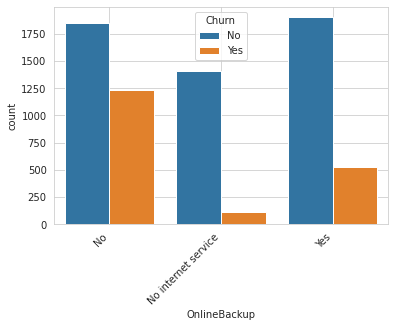

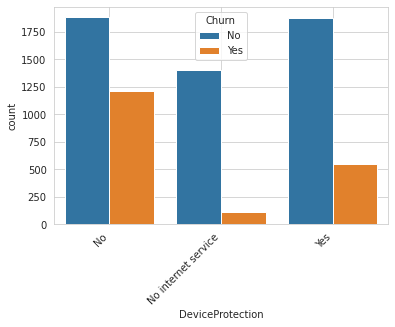

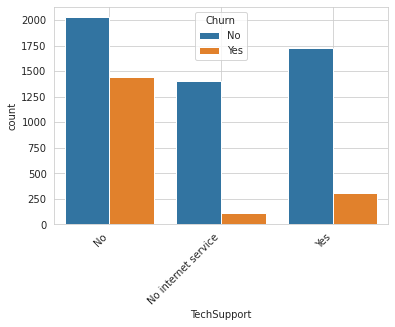

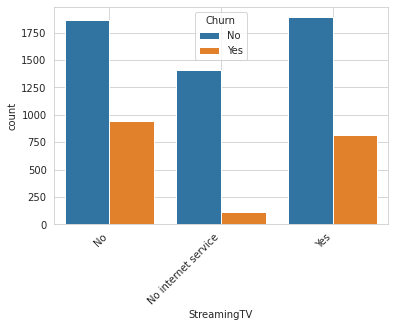

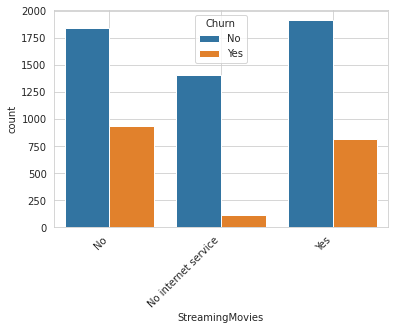

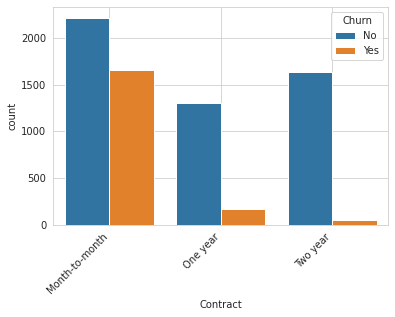

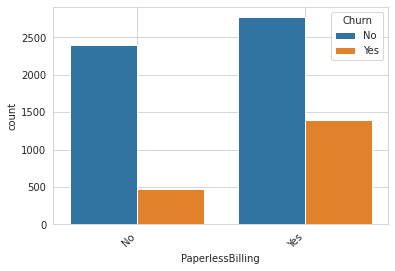

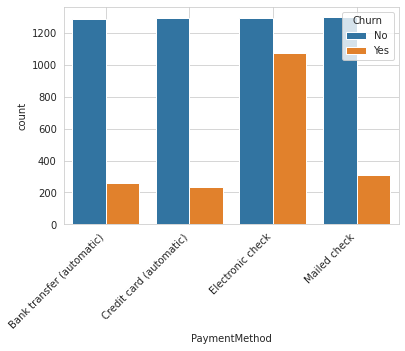

In [ ]:
# categorical variables
for i in categoricalVariable:
    sns.countplot(x = data[i], hue=data["Churn"])
    plt.xticks(rotation=45, ha='right')
    plt.grid()
    plt.show()

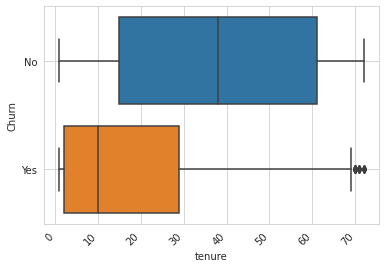

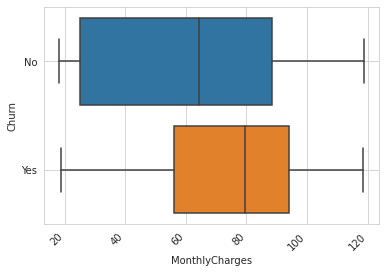

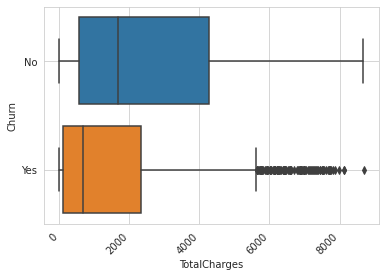

In [ ]:
# continuous variables
for i in continuousVariable:
    sns.boxplot(x = data[i], y = data["Churn"])
    plt.xticks(rotation=45, ha='right')
    plt.grid()
    plt.show()

## Feature Importance Ranking

In [ ]:
data_factorize = data.copy()
for i in catVar:
  data_factorize[i] = pd.factorize(data_factorize[i])[0]

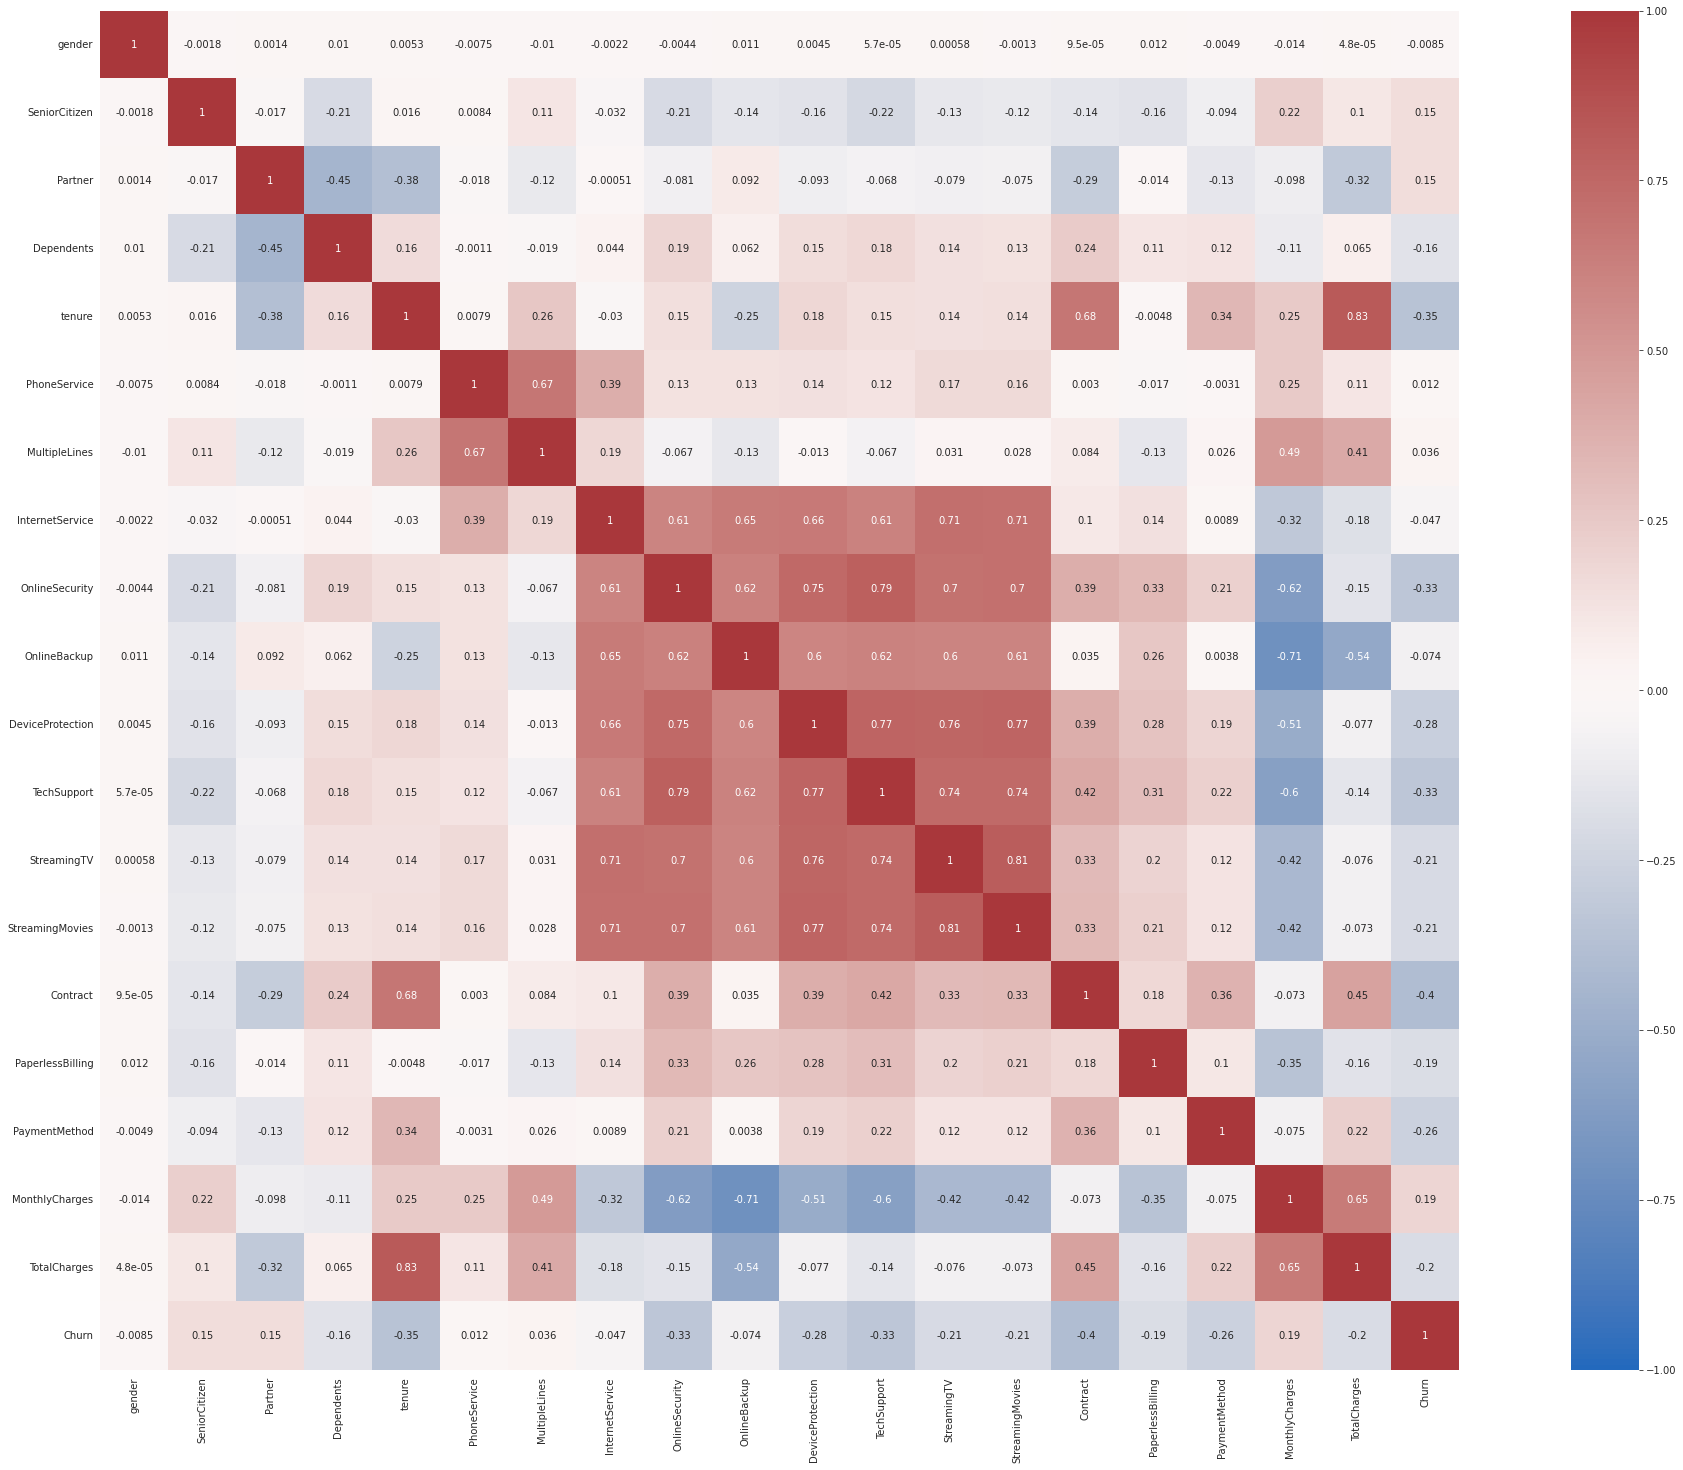

In [ ]:
plt.figure(figsize=(40, 25))
sns.heatmap(data_factorize.corr(), vmin=-1, vmax=1, annot=True, square=True, cmap = 'vlag')

In [ ]:
data_factorize.corr()["Churn"].sort_values(key = abs, ascending = False)

Churn               1.000000
Contract           -0.396150
tenure             -0.354049
OnlineSecurity     -0.332443
TechSupport        -0.329474
DeviceProtection   -0.281048
PaymentMethod      -0.262918
StreamingMovies    -0.207150
StreamingTV        -0.205246
TotalCharges       -0.199484
MonthlyCharges      0.192858
PaperlessBilling   -0.191454
Dependents         -0.163128
SeniorCitizen       0.150541
Partner             0.149982
OnlineBackup       -0.073934
InternetService    -0.047097
MultipleLines       0.036148
PhoneService        0.011691
gender             -0.008545
Name: Churn, dtype: float64

## Feature Selection

In [ ]:
corr_matrix = data_factorize.corr().where(np.triu(np.ones(data_factorize.corr().shape), k=1).astype(np.bool))
sorted_mat = corr_matrix.unstack().dropna().sort_values(key = abs, ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
sorted_mat[abs(sorted_mat) >= 0.7]

TotalCharges      tenure              0.825880
StreamingMovies   StreamingTV         0.809507
TechSupport       OnlineSecurity      0.790951
                  DeviceProtection    0.767659
StreamingMovies   DeviceProtection    0.766635
StreamingTV       DeviceProtection    0.762742
DeviceProtection  OnlineSecurity      0.748684
StreamingTV       TechSupport         0.737211
StreamingMovies   TechSupport         0.737126
StreamingTV       InternetService     0.712715
MonthlyCharges    OnlineBackup       -0.710175
StreamingMovies   InternetService     0.708336
                  OnlineSecurity      0.704672
StreamingTV       OnlineSecurity      0.701526
dtype: float64

In [ ]:
feature_drop = ["TotalCharges", "StreamingTV", "TechSupport", "DeviceProtection", "OnlineBackup", "InternetService", "StreamingMovies" ]
data_final = data.drop(feature_drop, axis=1)
feature_list = data_final.columns.drop("Churn")

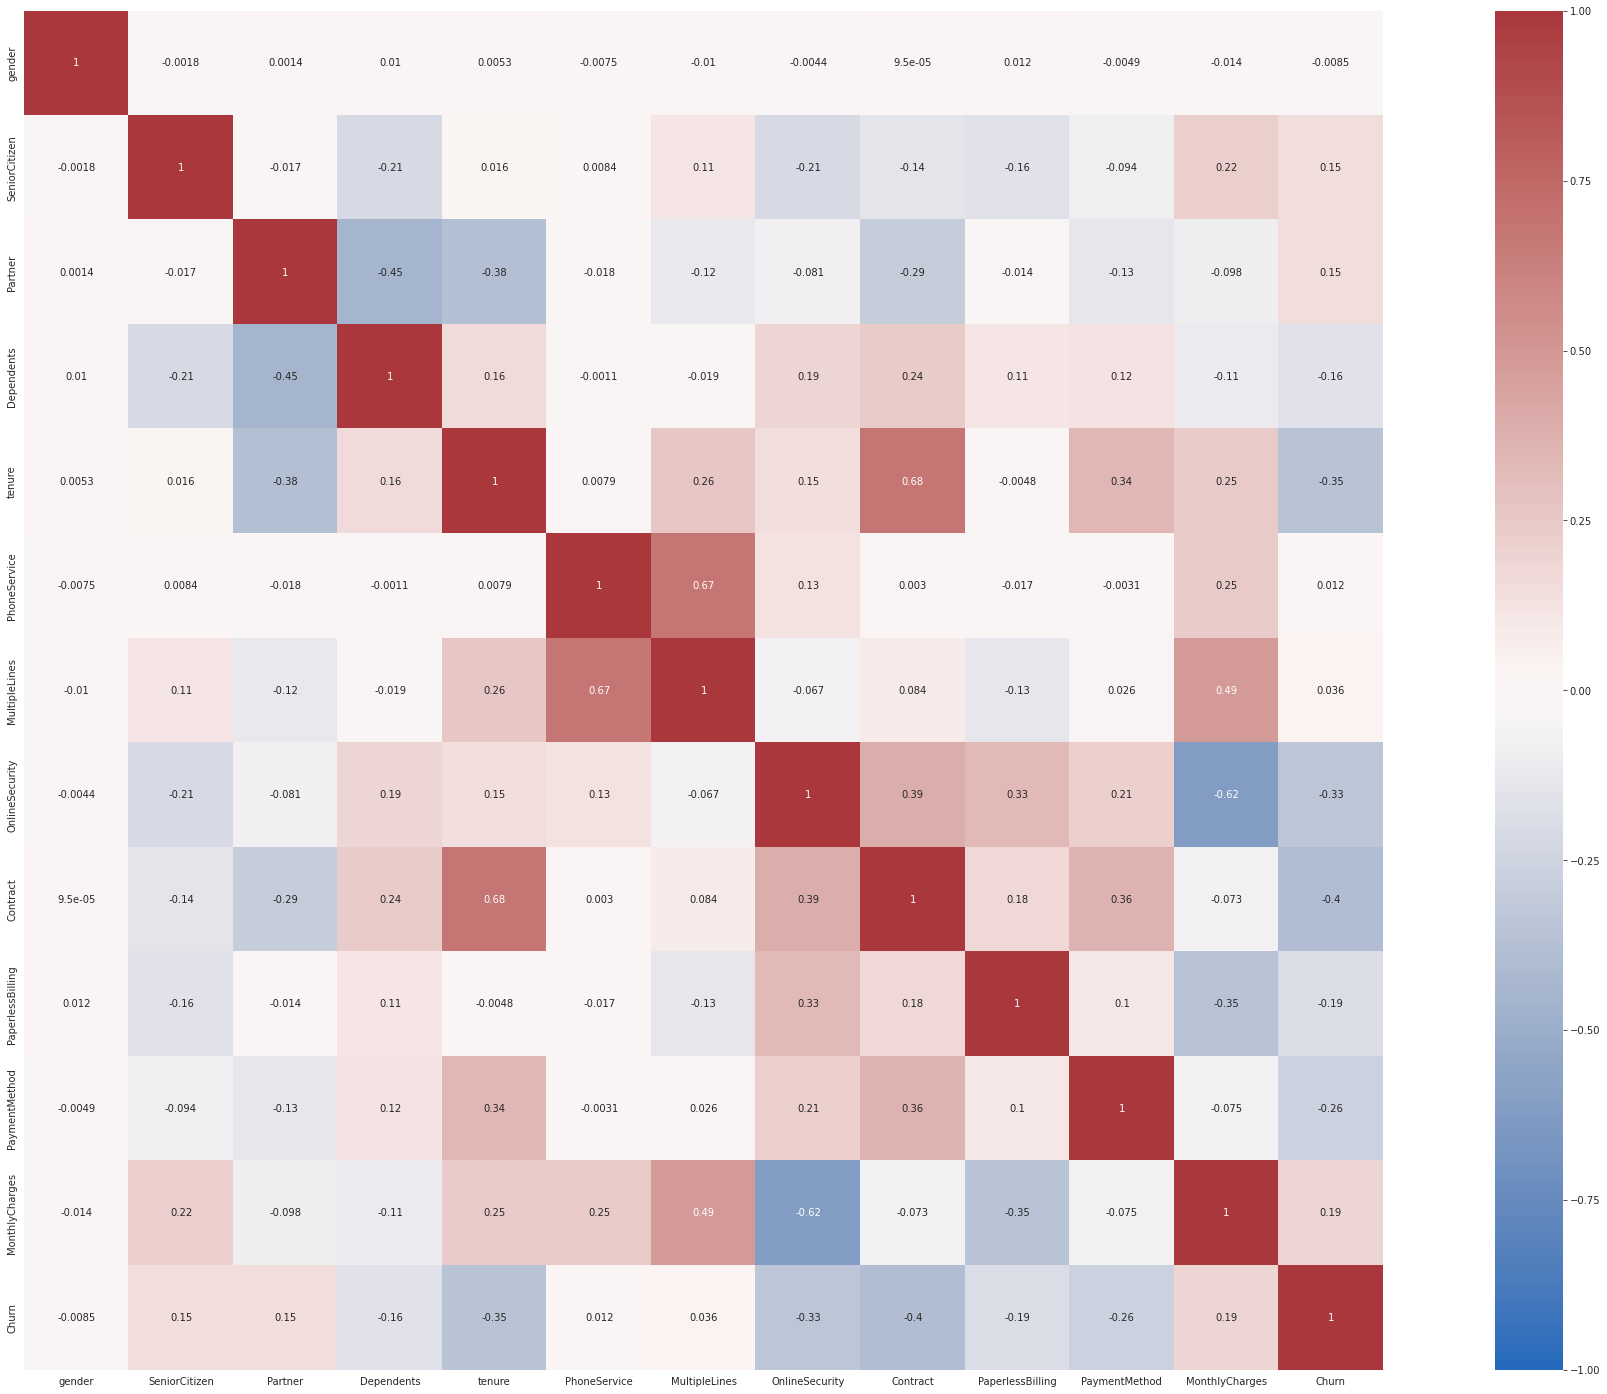

In [ ]:
plt.figure(figsize=(40, 25))
sns.heatmap(data_factorize.drop(feature_drop, axis = 1).corr(), vmin=-1, vmax=1, annot=True, square=True, cmap = 'vlag')

## Model Building and Performance Comparison

In [ ]:
continuousVariable_list = data_final.select_dtypes(exclude=["category"]).columns.to_list()
categoricalVariable_list = data_final.select_dtypes("category").columns.to_list()
for i in categoricalVariable_list:
  d = dict(enumerate(data_final[i].cat.categories))
  print (i, d)
  data_final[i] = data_final[i].cat.codes

gender {0: 'Female', 1: 'Male'}
SeniorCitizen {0: '0', 1: '1'}
Partner {0: 'No', 1: 'Yes'}
Dependents {0: 'No', 1: 'Yes'}
PhoneService {0: 'No', 1: 'Yes'}
MultipleLines {0: 'No', 1: 'No phone service', 2: 'Yes'}
OnlineSecurity {0: 'No', 1: 'No internet service', 2: 'Yes'}
Contract {0: 'Month-to-month', 1: 'One year', 2: 'Two year'}
PaperlessBilling {0: 'No', 1: 'Yes'}
PaymentMethod {0: 'Bank transfer (automatic)', 1: 'Credit card (automatic)', 2: 'Electronic check', 3: 'Mailed check'}
Churn {0: 'No', 1: 'Yes'}


In [ ]:
# test & training split
x_train, x_test, y_train, y_test = train_test_split(data_final[feature_list], data_final["Churn"], test_size = .3, random_state = 0)

In [ ]:
print("Training dataset contains ",x_train.shape[0], " rows and ", x_train.shape[1], " columns")
print("Test dataset contains ",x_test.shape[0], " rows and ", x_test.shape[1], " columns")

print("The features are: ", x_train.columns.to_list())

Training dataset contains  4922  rows and  12  columns
Test dataset contains  2110  rows and  12  columns
The features are:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']


In [ ]:
y_train.value_counts()

0    3608
1    1314
Name: Churn, dtype: int64

### Logistic Regression



In [ ]:
LRmodel = LogisticRegression(solver='lbfgs', max_iter=1000 )
LRmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = LRmodel.predict(x_test)
LRmodel_roc_auc = roc_auc_score(y_test, y_pred)
print("Area under the ROC Curve: ", LRmodel_roc_auc)

Area under the ROC Curve:  0.7097505865994611


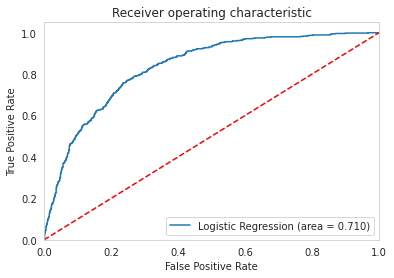

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, LRmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % LRmodel_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### K-Nearest Neighbor (KNN)

In [ ]:
# default

KNNmodel = KNeighborsClassifier(n_neighbors = 5)
KNNmodel.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = KNNmodel.predict(x_test)
KNNmodel_roc_auc = roc_auc_score(y_test, y_pred)
print("Area under the ROC Curve (5-NN): ", KNNmodel_roc_auc)

Area under the ROC Curve (5-NN):  0.6839546942440833


In [ ]:
#tuning for number of neighbors

n_neighbors = list(range(1,50))
hyperparameters = dict(n_neighbors=n_neighbors)
knn_t = KNeighborsClassifier()
clf = GridSearchCV(knn_t, hyperparameters, cv=10)
best_model = clf.fit(x_train, y_train)
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best n_neighbors: 14


In [ ]:
# better model
KNNmodel = KNeighborsClassifier(n_neighbors = 14)
KNNmodel.fit(x_train, y_train)
y_pred = KNNmodel.predict(x_test)
KNNmodel_roc_auc = roc_auc_score(y_test, y_pred)
print("Area under the ROC Curve (14-NN): ", KNNmodel_roc_auc)

Area under the ROC Curve (14-NN):  0.6939804756525014


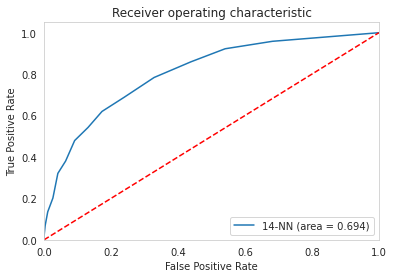

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, KNNmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='14-NN (area = %0.3f)' % KNNmodel_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [ ]:
# default parameters
RFmodel = RandomForestClassifier(random_state = 111, n_estimators = 100)
RFmodel.fit(x_train, y_train)
RFmodel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 111,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred = RFmodel.predict(x_test)
RFmodel_roc_auc = roc_auc_score(y_test, y_pred)
print("Area under the ROC Curve: ", RFmodel_roc_auc)

Area under the ROC Curve:  0.6805364850380928


In [ ]:
#tuning parameters
n_estimators = [100, 200, 500, 1000]
criterion = ['entropy', 'gini']
max_depth = [None,1,3,5,7,9]
min_samples_split = list(range(2, 10))
min_samples_leaf = [1,3,5]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
RFmodel_t = RandomForestClassifier(random_state = 111)
clf = GridSearchCV(RFmodel_t, hyperparameters, cv=3, n_jobs = -1)
best_model = clf.fit(x_train, y_train)
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', best_model.best_estimator_.get_params()['min_samples_leaf'])

Best n_estimators: 200
Best criterion: gini
Best max_depth: 7
Best min_samples_split: 8
Best min_samples_leaf: 1


In [ ]:
# better model
RFmodel = RandomForestClassifier(random_state = 111, n_estimators = 200,
                                 criterion = 'gini',
                                 max_depth = 7,
                                 min_samples_split = 8,
                                 min_samples_leaf = 1)
RFmodel.fit(x_train, y_train)
y_pred = RFmodel.predict(x_test)
RFmodel_roc_auc = roc_auc_score(y_test, y_pred)
print("Area under the ROC Curve: ", RFmodel_roc_auc)

Area under the ROC Curve:  0.6887662582196344


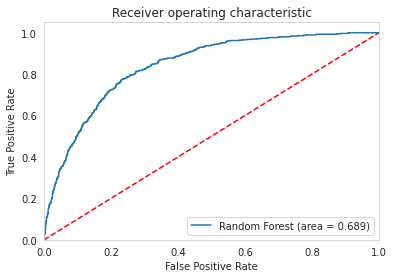

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, RFmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.3f)' % RFmodel_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting

In [ ]:
GBmodel = GradientBoostingClassifier(learning_rate=0.1)
GBmodel.fit(x_train,y_train)
GBmodel.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred = GBmodel.predict(x_test)
GBmodel_roc_auc = roc_auc_score(y_test, y_pred)
print("Area under the ROC Curve: ", GBmodel_roc_auc)

Area under the ROC Curve:  0.709683960487819


In [ ]:
#tuning parameters
learning_rate = [0.001, 0.01, 0.1, 1]
n_estimators = [5, 50, 100, 250, 500]
max_depth = [1,3,5,7,9]
hyperparameters = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
GBmodel_t = GradientBoostingClassifier()
clf = GridSearchCV(GBmodel_t, hyperparameters, cv=10)
best_model = clf.fit(x_train, y_train)
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

Best learning_rate: 0.1
Best n_estimators: 250
Best max_depth: 1


In [ ]:
# better model
GBmodel = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 250, max_depth = 1 )
GBmodel.fit(x_train,y_train)
y_pred = GBmodel.predict(x_test)
GBmodel_roc_auc = roc_auc_score(y_test, y_pred)
print("Area under the ROC Curve: ", GBmodel_roc_auc)

Area under the ROC Curve:  0.7103907766287189


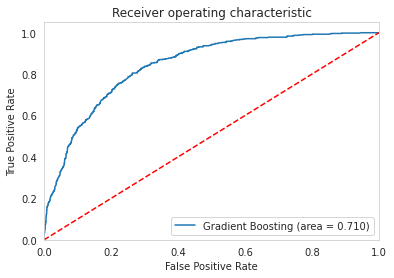

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, GBmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.3f)' % GBmodel_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()